In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load and unify data sets

In [2]:
datasets = []
for file in glob.glob("data-seq-journal/*_bench.csv"):
    print(file)
    tagged_lines = []
    with open(file) as f:
        for line in f:
            if line.startswith("[CSV]"):
                tagged_lines.append(line[5:])
    
    if not tagged_lines:
        data = pd.read_csv(file)
    else:
        data = pd.read_csv(StringIO("".join(tagged_lines)) )
       
    if not "PLE" in data.columns:
        data["PLE"] = data.alpha * 2 + 1.0
    if not "TimeTotal" in data.columns:
        data["TimeTotal"] = data.totalTime
    if not "GenAvgDeg" in data.columns:
        #print(data)
        data["GenAvgDeg"] = 2.0 * data.edges / data.n
    if not "edges" in data.columns:
        data["edges"] = 0.5 * data.GenAvgDeg * data.n
    if not "avgDeg" in data.columns:
        data["avgDeg"] = data.deg
    if not "GenNumEdge" in data.columns:
        data["GenNumEdge"] = data.edges
        
    datasets.append(data.copy())
    
data = pd.concat(datasets)
data = data[data.TimeTotal > 0] # discard unsucessful runs (timeout)
data = data[data.n >= 1e4]

# Rename Algos
data.algo = data.algo.str \
    .replace("nkgen", "NkGen") \
    .replace("nkbin", "NkGenBin") \
    .replace("hypergirgs", "HyperGIRGs")

# give indication on the statistics of each generator data set
data[(data.n == 1e5)] .groupby(["algo", "T"]).size()

colors = {
    "HyperGIRGs": "red",
    "Embedder": "blue",
    "HyperGen": "aqua",
    "NkGen": "green",
    "NkOpt": "pink",
    "NkGenBin": "black",
}

linestyles = {
    "HyperGIRGs": "-",
    "Embedder": "-.",
    "HyperGen": "--",
    "NkGen": ":",
    "NkOpt": "-.",
    "NkGenBin": "--",
}

data = data[data.GenNumEdge <= 1.1e9]
data.TimeTotal.max()

data-seq-journal/nkopt_bench.csv
data-seq-journal/hypergirgs_bench.csv
data-seq-journal/nkbin_bench.csv
data-seq-journal/nkgen_bench.csv
data-seq-journal/embedder_bench.csv
data-seq-journal/hypergen_bench.csv


585924.0

# Plot runtimes as function of number of nodes



avgDeg=10, PLE=2.200 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


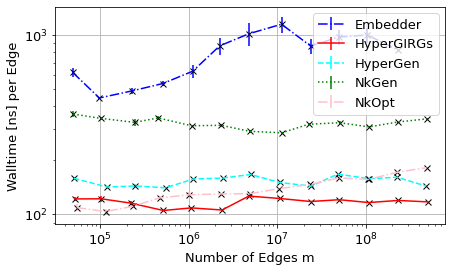



avgDeg=10, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


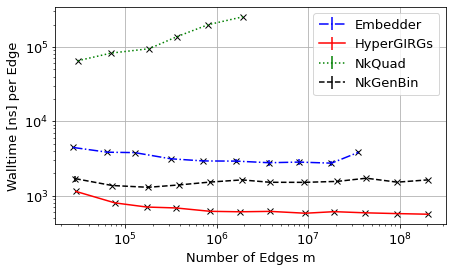



avgDeg=10, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


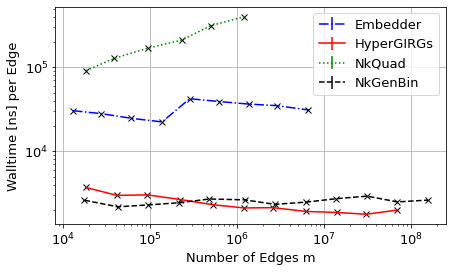



avgDeg=10, PLE=3.000 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


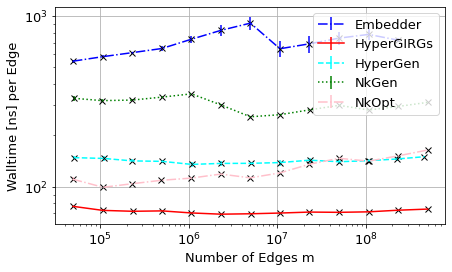



avgDeg=10, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


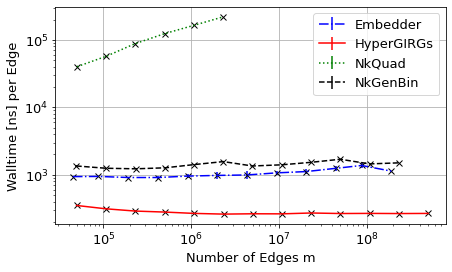



avgDeg=10, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


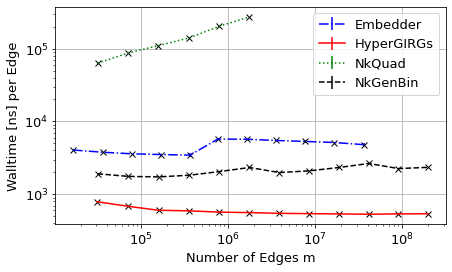



avgDeg=100, PLE=2.200 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


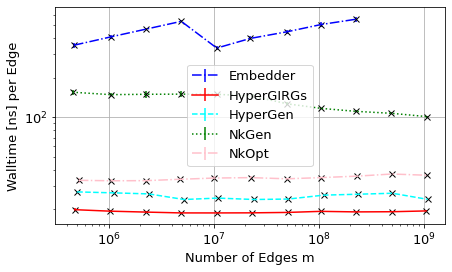



avgDeg=100, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


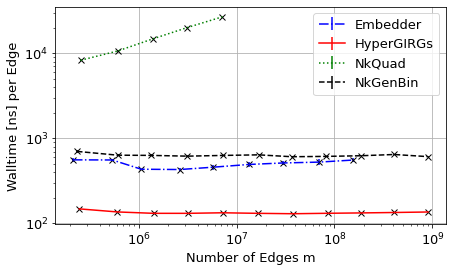



avgDeg=100, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


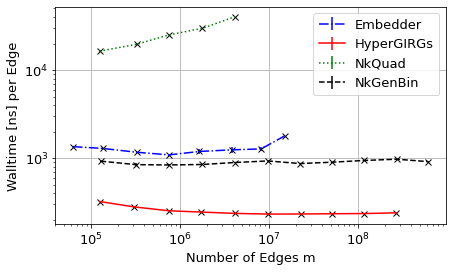



avgDeg=100, PLE=3.000 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


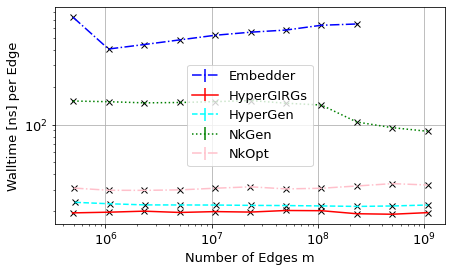



avgDeg=100, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


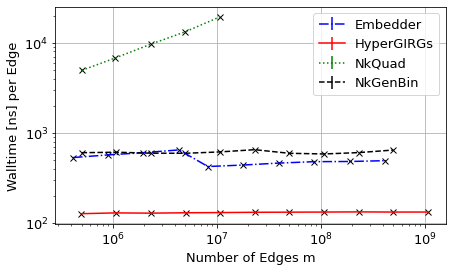



avgDeg=100, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


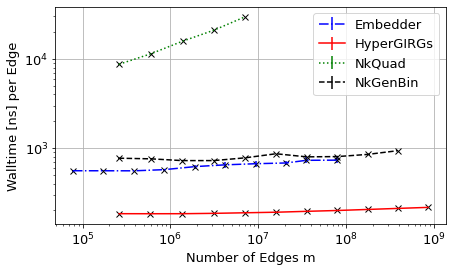



avgDeg=1000, PLE=2.200 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


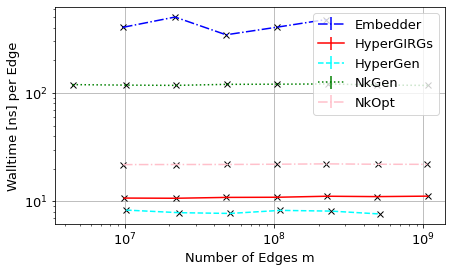



avgDeg=1000, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


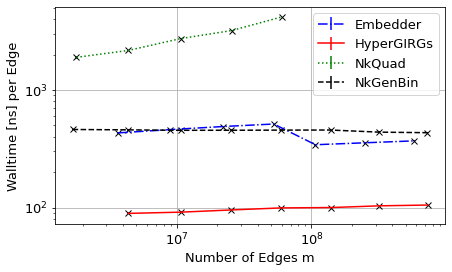



avgDeg=1000, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


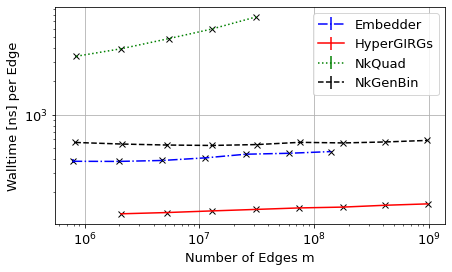



avgDeg=1000, PLE=3.000 T=0.000
['NkOpt' 'HyperGIRGs' 'NkGen' 'Embedder' 'HyperGen']


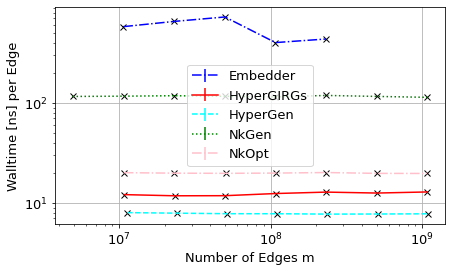



avgDeg=1000, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


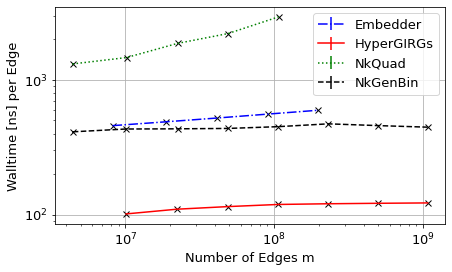



avgDeg=1000, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGenBin' 'NkGen' 'Embedder']


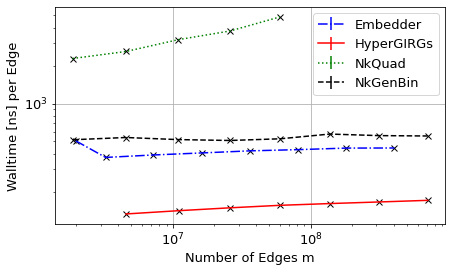

In [9]:
plt.rcParams.update({'font.size': 13})

def ploteb(view, valueIndex, legend="", keyIndex = "n", ax = plt, color=None, ls = None):
    xs = view[keyIndex].median()
    ys = view[valueIndex].median() / xs * 1e6
    yerr = view[valueIndex].std() / xs * 1e6
    
    ax.plot(xs, ys, "xk")
    ax.errorbar(xs, ys, yerr, color=color, linestyle=ls, label=legend)

for run, run_view in data.groupby(["avgDeg", "PLE", "T"]):
    algos = sorted(run_view.algo.unique())
    title = "avgDeg=%d, PLE=%.3f T=%.3f" % run
    print("\n\n" + title)
    print(run_view.algo.unique())
    f, ax = plt.subplots(figsize=(7,4))
    
    ax.set_ylabel("Walltime [ns] per Edge")
    ax.set_xlabel("Number of Edges m")
    ax.loglog()
    ax.grid()

    for i, algo in enumerate(algos):
        grp = run_view[run_view.algo==algo].groupby("n")
        name = algo
        if run[2] > 0 and algo=='NkGen':
            name = 'NkQuad'
        ploteb(grp, "TimeTotal", name, ax = ax, keyIndex="GenNumEdge", color=colors[algo], ls = linestyles[algo])
        
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom=min(bottom, 9.5))
    # ax.set_ylim(top=max(top,10**3+5))
    
    plt.legend()
    plt.savefig("runtime_rhg_%d_%.1f_%.1f-seq.pdf" % run, bbox_inches='tight')
    plt.show()
        